In [41]:
from google.cloud import vision

def detect_labels(image_path):
    client = vision.ImageAnnotatorClient()

    with open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations

    labels_all = ""

    
    for label in labels:
        # print(label.description)
        labels_all += label.description + ","

    return labels_all
    
  
# Specify the path to your local image
image_path = 'Data/aashnashroff_969148_3000403601659402518_25980_65/2022-12-24_15-33-23_UTC_1.jpg'

# Call the label detection function

# print(detect_labels(image_path))


In [11]:
# Creating a dataframe with columns: post_id = name of the folders inside folder Data, image1_name = name of first image in the folder, comments_count = from json file data["node"]["edge_media_to_comment"]["count"], caption = from .txt file in the folder

import os
import json
import pandas as pd

# Path to the 'Data' directory
data_dir = 'Data'  # Change this to the path of your 'Data' directory

# Prepare a list to store each row's data
data = []

# Traverse through each post's folder inside the 'Data' directory
for post_id in os.listdir(data_dir):
    post_dir = os.path.join(data_dir, post_id)
    
    # Check if it's a directory
    if os.path.isdir(post_dir):
        # List all files and sort them to ensure consistency
        files = sorted(os.listdir(post_dir))
        
        # Initialize variables
        image1_name = None
        comments_count = None
        
        # Look for the first image and JSON file
        for file in files:
            if file.endswith('.json'):
                # Read the JSON file
                with open(os.path.join(post_dir, file), 'r') as f:
                    json_data = json.load(f)
                    # Extract comments_count
                    comments_count = json_data["node"]["edge_media_to_comment"]["count"]
            elif image1_name is None and (file.endswith('.jpg') or file.endswith('.png')):
                # Assume the first image encountered is image1
                image1_name = file

            elif file.endswith('.txt'):
                # Read the caption from the text file
                with open(os.path.join(post_dir, file), 'r') as f:
                    caption = f.read()
        
        # Append the data for the current post to the list
        data.append({'post_id': post_id, 'image1_name': image1_name, 'comments_count': comments_count, 'caption': caption})

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,post_id,image1_name,comments_count,caption
0,kayaancontractor_100226_2868439159916464863_205_2,2022-06-25_13-43-36_UTC_1.jpg,2,“Got your nose!”🫶🏻 #caturday \n.\n#saturday #l...
1,debasreee_307029_3066886135067171352_7650_20,2023-03-26_09-02-19_UTC_1.jpg,20,Dreaming of this as I have the laziest Sunday ...
2,shereenlovebug_333413_3029832820659598377_456_27,2023-02-03_06-03-59_UTC_1.jpg,27,@diorbeauty forever 🖤\n.\n.\n.\n\n⁣\n.⁣\n.⁣\n....
3,mandirabedi_2034192_2889470489057495466_9167_86,2022-07-24_14-09-05_UTC_1.jpg,86,And that’s how you eat a s’more !! \n#marshmel...
4,rahulkl_130314_3053766391959056433_4057_18,2023-03-08_06-35-43_UTC.jpg,18,Happy Holi everyone 😆❤️💚💜\n\nHas v liya karro ...


In [12]:
df[df['post_id'] == 'aashnashroff_969148_3000403601659402518_25980_65']


,post_id,image1_name,comments_count,caption
1856,aashnashroff_969148_3000403601659402518_25980_65,2022-12-24_15-33-23_UTC_1.jpg,65,Bonjour Paree 🥐 ready for a Parisian Christmas...


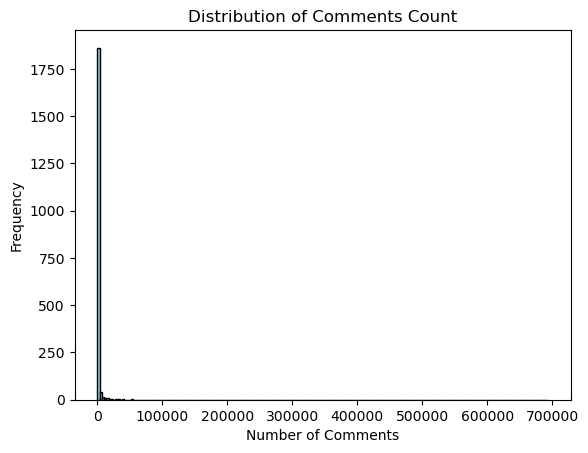

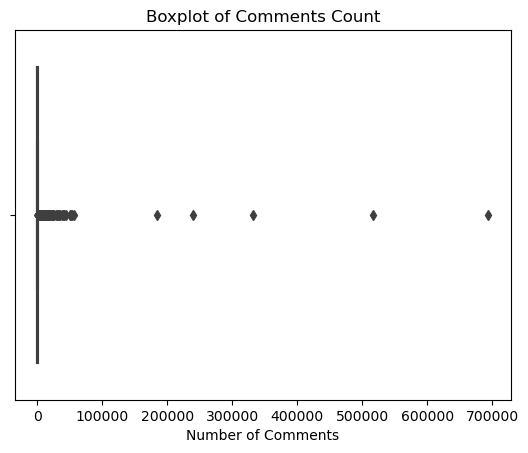

In [15]:
# plot comments_count distribution
import matplotlib.pyplot as plt

plt.hist(df['comments_count'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments Count')
plt.show()

#box plot
import seaborn as sns

sns.boxplot(x=df['comments_count'])
plt.xlabel('Number of Comments')
plt.title('Boxplot of Comments Count')
plt.show()

In [16]:
#quartiles of comments_count
quartiles = df['comments_count'].quantile([0.25, 0.5, 0.75])
print(quartiles)

0.25     30.0
0.50     95.5
0.75    416.0
Name: comments_count, dtype: float64


In [26]:
#sorting the dataframe based on comments_count
df_sorted = df.sort_values('comments_count', ascending=False)
df_sorted

,post_id,image1_name,comments_count,caption
1045,halfbakedharvest_5247243_2996407846187385570_2...,2022-12-19_03-14-32_UTC.jpg,693966,GIVEAWAY🎄Week 2 of Christmas giveaways!! This ...
511,halfbakedharvest_5247243_2990612658156456674_2...,2022-12-11_03-20-32_UTC.jpg,515973,GIVEAWAY ☃️ week 2 of Christmas giveaways. The...
1834,halfbakedharvest_5247243_2986269265263400579_1...,2022-12-05_03-30-59_UTC.jpg,331474,GIVEAWAY 🎄Kicking off our holiday giveaways an...
10,halfbakedharvest_5247243_3000750743145862289_1...,2022-12-25_03-03-05_UTC.jpg,239765,GIVEAWAY 🎅 one last Christmas Eve giveaway! Ce...
578,halfbakedharvest_5247243_2869549391481578933_9...,2022-06-27_02-29-26_UTC.jpg,184733,GIVEAWAY 🦋 I said this was coming (: the suppo...
...,...,...,...,...
330,eventplannerlife_181_456753512781395346_17_0,2013-05-16_01-54-43_UTC.jpg,0,#california #yacht #events #travel 🍸🌴☀✈💕🍹\n
437,eventplanneracademy_33_2283360642806948755_99_0,2020-04-09_07-37-01_UTC.jpg,0,Besuche jetzt unsere Academy! Erhalte CHF 200...
941,kunalgir_13965_2261132305343390536_888_0,2020-03-09_15-33-17_UTC.jpg,0,"It is said that in the beginning of time, when..."
1210,kunalgir_13965_2138354707539057422_556_0,2019-09-22_05-56-07_UTC.jpg,0,When there is no gym around. \nCourtesy: @decc...


In [65]:
#pick random 500 rows to the google vision api calls
df_500 = df_sorted.sample(500, random_state=42)
df_500.describe()

,comments_count
count,500.000000
mean,1362.990000
std,14948.927221
min,0.000000
25%,30.750000
50%,102.500000
75%,446.750000
max,331474.000000


In [64]:
#test dataframe with 5 random rows
df_sample = df_sorted.sample(5)
df_sample

,post_id,image1_name,comments_count,caption
1350,trishalalovebug_127191_3048810488068157197_-1_16,2023-03-01_10-29-14_UTC_1.jpg,16,Step into my दरबार 🏰💗\n.\n.\n.\n#payalsinghal ...
46,minimalistbaker_2144759_3059729369782740681_21...,2023-03-16_12-03-06_UTC_1.jpg,30,"Tastes like a milkshake, but sneaks in a veggi..."
1310,rheakapoor_1775885_3068302405883089877_7813_83,2023-03-28_07-56-11_UTC_1.jpg,83,"The other night, celebrating @kapoor.sunita 💛\n"
1041,houseofmisu_466180_3063379624446353309_3373_46,2023-03-21_12-55-30_UTC_1.jpg,46,I always fancied myself a bit of a wander lust...
1289,iamsteveharveytv_10645894_2872239775220019061_...,2022-06-30_19-34-44_UTC_1.jpg,802,Old school meets High fashion #Outtakes\n\nSty...


In [43]:
#adding labels to the images from google vision api calling detect_labels function

# Add a new column 'labels' to the DataFrame
label_list = []
for i in range(len(df_sample)):
    image_path = "Data/" + df_sample['post_id'].iloc[i] + "/" + df_sample['image1_name'].iloc[i]
    labels = detect_labels(image_path)
    label_list.append(labels)

df_sample['labels'] = label_list
df_sample
    




Data/sachintendulkar_39433992_3063921521760160771_1417107_3330/2023-03-22_06-52-09_UTC.jpg
Data/brendonburchard_1158797_3042986395971590589_2528_64/2023-02-21_09-37-48_UTC.jpg
Data/shreyas41_6992256_2976185436391125328_938684_1625/2022-11-21_05-36-13_UTC_1.jpg
Data/brendonburchard_1158797_3044039991576878179_3441_88/2023-02-22_20-31-06_UTC.jpg
Data/smittenkitchen_1706412_3060485528788894096_2700_38/2023-03-17_13-05-27_UTC.jpg


,post_id,image1_name,comments_count,caption,labels
1037,sachintendulkar_39433992_3063921521760160771_1...,2023-03-22_06-52-09_UTC.jpg,3330,आज गुढी उभारून ही प्रार्थना करतो की नवीन वर्षा...,"Plant,Fashion,Temple,Fashion design,Event,Patt..."
1377,brendonburchard_1158797_3042986395971590589_25...,2023-02-21_09-37-48_UTC.jpg,64,"This is why we need personal development, to i...","Font,Screenshot,Brand,Circle,Logo,"
781,shreyas41_6992256_2976185436391125328_938684_1625,2022-11-21_05-36-13_UTC_1.jpg,1625,Magical sky 😍\nLooks so fly😎\n,"Footwear,Cloud,Sky,Shorts,Active shorts,Blue,A..."
1147,brendonburchard_1158797_3044039991576878179_34...,2023-02-22_20-31-06_UTC.jpg,88,All this bracket madness has us thinking... wh...,"Font,Electric blue,Brand,"
929,smittenkitchen_1706412_3060485528788894096_270...,2023-03-17_13-05-27_UTC.jpg,38,"A forever favorite, the stout here gives what ...","Food,Ingredient,Baked goods,Cuisine,Doughnut,S..."


In [47]:
#save csv
df_sample.to_csv('sample.csv', index=False)

In [66]:
#running on df_500

# Add a new column 'labels' to the DataFrame
label_list = []
for i in range(len(df_500)):
    image_path = "Data/" + df_500['post_id'].iloc[i] + "/" + df_500['image1_name'].iloc[i]
    labels = detect_labels(image_path)
    label_list.append(labels)
    if i % 25 == 0:
        print(i)

df_500['labels'] = label_list
df_500





0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475


,post_id,image1_name,comments_count,caption,labels
1891,anshukayoga_403394_2980015710008403800_3087_133,2022-11-26_12-26-17_UTC.jpg,133,A honour and privilege I will always be gratef...,"Product,Flooring,Smile,Fashion design,Beauty,E..."
110,santoshishetty_746384_3016966416826776493_7112_30,2023-01-16_12-00-44_UTC_1.jpg,30,Was looking for some photos with @pryanca_t to...,"Glasses,Plant,Shoulder,Shorts,Vision care,Sung..."
1620,sachintendulkar_39433992_3033645984018219249_2...,2023-02-08_12-20-04_UTC_1.jpg,8790,Can you guess the city?\n\n#travel #travelgram\n,"Building,Sky,Water,Smile,Photograph,Skyscraper..."
1633,hbomax_3056324_3057101339109716519_20102_73,2023-03-12_21-01-40_UTC.jpg,73,By your side. \n\nThe season finale of #TheLas...,"Comfort,Flash photography,Fun,Darkness,Art,Sit..."
140,ajinkyarahane_4701882_2982886863247728429_9568...,2022-11-30_11-30-45_UTC.jpg,133,Our experience with Reelabs has been extremely...,"Joint,Smile,Arm,Shoulder,Beard,Neck,Sleeve,Hap..."
...,...,...,...,...,...
1933,ishant.sharma29_1487653_2985145717529544729_29...,2022-12-03_14-18-41_UTC_1.jpg,187,Suited up! 🙌\n,"Footwear,Shoe,Dress shirt,Sleeve,Hat,Standing,..."
1375,rashwin99_3955334_3059606182923387629_732332_784,2023-03-16_07-58-21_UTC_1.jpg,784,Yet another memorable test series. #bgt23 \nRu...,"Smile,Leg,Art,Knee,Flooring,Leisure,Elbow,Idio..."
283,iamjoelbrown_128782_3050046935080335212_705_82,2023-03-03_03-25-49_UTC_1.jpg,82,Let me lay it out straight: I once fell for a ...,"Eyebrow,Flash photography,Eyelash,Font,Step cu..."
412,santoshishetty_746384_3052632766890776495_4410_56,2023-03-06_17-03-25_UTC_1.jpg,56,The Sufi night at #SoulFestival2023 got us dre...,"Shoulder,Flash photography,Waist,Thigh,Trunk,F..."


In [67]:
#save csv
df_500.to_csv('df_500.csv', index=False)